In [1]:
# string_with_nonASCII = "àa string withé fuünny charactersß."

# encoded_string = string_with_nonASCII.encode("ascii", "ignore")
# decode_string = encoded_string.decode()

# print(decode_string)

In [2]:
import numpy as np

In [3]:
text_file = open('richards_book.txt',encoding="cp437")
text_file_lines = text_file.readlines()
text_file_lines

['EUCLIDÆS ELEMENTS OF GEOMETRY\n',
 'The Greek text of J.L. Heiberg (1883û1885)\n',
 'from Euclidis Elementa, edidit et Latine interpretatus est I.L. Heiberg, in aedibus\n',
 'B.G. Teubneri, 1883û1885\n',
 'edited, and provided with a modern English translation, by\n',
 'Richard Fitzpatrick\n',
 'First edition - 2007\n',
 'Revised and corrected - 2008\n',
 'ISBN 978-0-6151-7984-1\n',
 'Contents\n',
 'Introduction 4\n',
 'Book 1 5\n',
 'Book 2 49\n',
 'Book 3 69\n',
 'Book 4 109\n',
 'Book 5 129\n',
 'Book 6 155\n',
 'Book 7 193\n',
 'Book 8 227\n',
 'Book 9 253\n',
 'Book 10 281\n',
 'Book 11 423\n',
 'Book 12 471\n',
 'Book 13 505\n',
 'Greek-English Lexicon 539\n',
 'Introduction\n',
 'EuclidÆs Elements is by far the most famous mathematical work of classical antiquity, and also has the distinction\n',
 'of being the worldÆs oldest continuously used mathematical textbook. Little is known about the author, beyond\n',
 'the fact that he lived in Alexandria around 300 BCE. The main sub

# Cleaning the text from greek letters

In [4]:
for i in range(len(text_file_lines)):
    text_file_lines[i] = text_file_lines[i].replace('?','')
    text_file_lines[i] = text_file_lines[i].replace('  ','')

while '\n' in text_file_lines:
    text_file_lines.remove('\n')
text_file_lines

['EUCLIDÆS ELEMENTS OF GEOMETRY\n',
 'The Greek text of J.L. Heiberg (1883û1885)\n',
 'from Euclidis Elementa, edidit et Latine interpretatus est I.L. Heiberg, in aedibus\n',
 'B.G. Teubneri, 1883û1885\n',
 'edited, and provided with a modern English translation, by\n',
 'Richard Fitzpatrick\n',
 'First edition - 2007\n',
 'Revised and corrected - 2008\n',
 'ISBN 978-0-6151-7984-1\n',
 'Contents\n',
 'Introduction 4\n',
 'Book 1 5\n',
 'Book 2 49\n',
 'Book 3 69\n',
 'Book 4 109\n',
 'Book 5 129\n',
 'Book 6 155\n',
 'Book 7 193\n',
 'Book 8 227\n',
 'Book 9 253\n',
 'Book 10 281\n',
 'Book 11 423\n',
 'Book 12 471\n',
 'Book 13 505\n',
 'Greek-English Lexicon 539\n',
 'Introduction\n',
 'EuclidÆs Elements is by far the most famous mathematical work of classical antiquity, and also has the distinction\n',
 'of being the worldÆs oldest continuously used mathematical textbook. Little is known about the author, beyond\n',
 'the fact that he lived in Alexandria around 300 BCE. The main sub

In [5]:
len(text_file_lines)

24536

# Book speration

In [6]:
books_headings = ['ELEMENTS BOOK ' + str(x) + '\n' for x in range(1,14)]
headings_index = []
for i in range(len(text_file_lines)):
    if text_file_lines[i] in books_headings:
        headings_index.append(i)

In [7]:
book_glossary = {}
headings_index.append(-1)
for i in range(len(books_headings)):
    book_glossary[books_headings[i]] = np.array(text_file_lines[headings_index[i]:headings_index[i+1]])

cleaning one sample book

In [8]:
desired_book = book_glossary['ELEMENTS BOOK 1\n']
lines_mask = [False]*len(desired_book)
for i in range(len(desired_book)):
    lines_mask[i] = '[P' in desired_book[i] or '[C' in desired_book[i] or 'Proposition' in desired_book[i]
desired_book = desired_book[lines_mask]

Propositions separation into dictionary

In [9]:
props_num = 1
props_index = []
for i in range(len(desired_book)):
    if 'Proposition' in desired_book[i]:
        props_index.append(i)
        desired_book[i] = 'Proposition '+ str(props_num)
        props_num+=1


In [10]:
desired_book_propos_dict = {}
props_titles = [ '[Prop 1.{}.]'.format(i) for i in range(1,len(props_index)+1) ]
desired_book_propos_dict = { x:[] for x in props_titles }

In [11]:
props_index.append(-1)

In [12]:
for i in range(len(props_index)-1):
    desired_book_propos_dict[props_titles[i]] = desired_book[ props_index[i]+1:props_index[i+1] ]
# props_index
# desired_book_propos_dict

Each proposition cleaning

In [13]:
%%writefile functions.py

def is_std_ref(string):
    """
    It finds whether the string has reference in itself.
    """
    return 'Prop.' in string or 'C.N.' in string or 'Post.' in string or 'Def.' in string


def std_ref_form(ref_string):
    """
    Deletes unnecessary chars from the string.
    Seperates combined references.
    returns the refernces in a list.
    """
    if ' corr.' in ref_string:
        ref_string = ref_string.replace(' corr.','')
    
    while ',' in ref_string:
        ref_string = ref_string.replace(', ',']#[')
    
    refs_list = ref_string.split('#')
    return refs_list

def proposition_cleaner(lines):
    """
    Lines is a list of strings dedicated to each propositon proof.
    This function should return its referenced notions in a single list of name strings.
    """
    ref_names = []
    for line in lines:
        for i in range(len(line)):
            if line[i] == '[':
                end_ref = line[i:].find(']') + i
                if is_std_ref(line[i:end_ref + 1]): #check if it has info.
                    ref_names.extend(std_ref_form(line[i: end_ref + 1])) #put the standard refs. in the list.
    
    while '[]' in ref_names:
        ref_names.remove('[]')
    
    return ref_names

Overwriting functions.py


In [14]:
from functions import proposition_cleaner
proposition_cleaner(desired_book_propos_dict['[Prop 1.4.]'])

['[Post. 1]', '[C.N. 4]', '[C.N. 4]', '[C.N. 4]', '[C.N. 4]']

In [15]:
for key in desired_book_propos_dict.keys():
    desired_book_propos_dict[key] = proposition_cleaner(desired_book_propos_dict[key])
desired_book_propos_dict

{'[Prop 1.1.]': ['[Post. 3]', '[Post. 3]', '[Post. 1]', '[C.N. 1]'],
 '[Prop 1.2.]': ['[Post. 1]',
  '[Prop. 1.1]',
  '[Post. 2]',
  '[Post. 3]',
  '[Post. 3]',
  '[C.N. 3]',
  '[C.N. 1]'],
 '[Prop 1.3.]': ['[Prop. 1.2]', '[Post. 3]', '[C.N. 1]'],
 '[Prop 1.4.]': ['[Post. 1]', '[C.N. 4]', '[C.N. 4]', '[C.N. 4]', '[C.N. 4]'],
 '[Prop 1.5.]': ['[Post. 2]',
  '[Prop. 1.3]',
  '[Post. 1]',
  '[Prop. 1.4]',
  '[C.N. 3]',
  '[Prop. 1.4]',
  '[C.N. 3]'],
 '[Prop 1.6.]': ['[Prop. 1.3]', '[Post. 1]', '[Prop. 1.4]', '[C.N. 5]'],
 '[Prop 1.7.]': ['[Post. 1]',
  '[Prop. 1.5]',
  '[C.N. 5]',
  '[C.N. 5]',
  '[Prop. 1.5]'],
 '[Prop 1.8.]': ['[Prop. 1.7]', '[C.N. 4]'],
 '[Prop 1.9.]': ['[Prop. 1.3]', '[Prop. 1.1]', '[Prop. 1.8]'],
 '[Prop 1.10.]': ['[Prop. 1.1]', '[Prop. 1.9]', '[Prop. 1.4]'],
 '[Prop 1.11.]': ['[Prop. 1.3]', '[Prop. 1.1]', '[Prop. 1.8]'],
 '[Prop 1.12.]': ['[Post. 3]', '[Prop. 1.10]', '[Prop. 1.8]'],
 '[Prop 1.13.]': ['[Prop. 1.11]', '[C.N. 2]', '[C.N. 2]', '[C.N. 1]'],
 '[Prop 1.14

# Netwokx comes to the scene

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

In [17]:
first_book_network = nx.DiGraph(desired_book_propos_dict)

In [18]:
first_book_network.edges()

OutEdgeView([('[Prop 1.1.]', '[Post. 3]'), ('[Prop 1.1.]', '[Post. 1]'), ('[Prop 1.1.]', '[C.N. 1]'), ('[Prop 1.2.]', '[Post. 1]'), ('[Prop 1.2.]', '[Prop. 1.1]'), ('[Prop 1.2.]', '[Post. 2]'), ('[Prop 1.2.]', '[Post. 3]'), ('[Prop 1.2.]', '[C.N. 3]'), ('[Prop 1.2.]', '[C.N. 1]'), ('[Prop 1.3.]', '[Prop. 1.2]'), ('[Prop 1.3.]', '[Post. 3]'), ('[Prop 1.3.]', '[C.N. 1]'), ('[Prop 1.4.]', '[Post. 1]'), ('[Prop 1.4.]', '[C.N. 4]'), ('[Prop 1.5.]', '[Post. 2]'), ('[Prop 1.5.]', '[Prop. 1.3]'), ('[Prop 1.5.]', '[Post. 1]'), ('[Prop 1.5.]', '[Prop. 1.4]'), ('[Prop 1.5.]', '[C.N. 3]'), ('[Prop 1.6.]', '[Prop. 1.3]'), ('[Prop 1.6.]', '[Post. 1]'), ('[Prop 1.6.]', '[Prop. 1.4]'), ('[Prop 1.6.]', '[C.N. 5]'), ('[Prop 1.7.]', '[Post. 1]'), ('[Prop 1.7.]', '[Prop. 1.5]'), ('[Prop 1.7.]', '[C.N. 5]'), ('[Prop 1.8.]', '[Prop. 1.7]'), ('[Prop 1.8.]', '[C.N. 4]'), ('[Prop 1.9.]', '[Prop. 1.3]'), ('[Prop 1.9.]', '[Prop. 1.1]'), ('[Prop 1.9.]', '[Prop. 1.8]'), ('[Prop 1.10.]', '[Prop. 1.1]'), ('[Prop 1.1

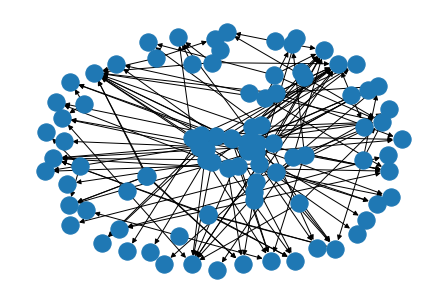

In [19]:
nx.draw(first_book_network)

(array([42., 26.,  9.,  6.,  5.,  1.,  2.,  1.,  0.,  2.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

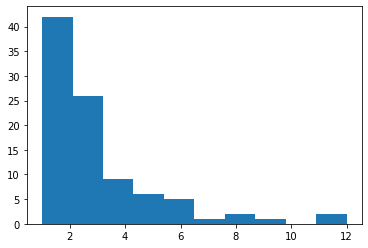

In [20]:
plt.hist(dict(first_book_network.degree()).values())

# Cleaning all the books

In [21]:
# %%writefile -a functions.py

def book_to_props_dict(book_num,book_lines):
    """
    This function will extract the propositions of given book and return them in one dictionary.
    """
    lines_mask = [False]*len(book_lines)
    for i in range(len(book_lines)):
        lines_mask[i] = '[P' in book_lines[i] or '[C' in book_lines[i] or '[D' in book_lines[i] or 'Proposition' in book_lines[i]
    book_lines = book_lines[lines_mask]
    
    props_num = 1
    props_index = []
    for i in range(len(book_lines)):
        if 'Proposition' in book_lines[i]:
            props_index.append(i)
            book_lines[i] = 'Proposition '+ str(props_num)
            props_num+=1
    
    book_lines_propos_dict = {}
    props_titles = [ '[Prop {}.{}.]'.format(book_num,i) for i in range(1,len(props_index)+1) ]
    book_lines_propos_dict = { x:[] for x in props_titles }
    props_index.append(-1)
    
    for i in range(len(props_index)-1):
        book_lines_propos_dict[props_titles[i]] = book_lines[ props_index[i]+1:props_index[i+1] ]
    
    for key in book_lines_propos_dict.keys():
        book_lines_propos_dict[key] = proposition_cleaner(book_lines_propos_dict[key])
    
    return book_lines_propos_dict

In [ ]:
# from functions import book_to_props_dict

book_to_props_dict(10,book_glossary['ELEMENTS BOOK 10\n'])

In [23]:
# %less functions.py

# Saving the total references

In [24]:
# import pickle
# for i in range(1,len(book_glossary.keys())+1):
#     a_file = open("books_references_dictionaries/ref_in_book_{}.pkl".format(i), "wb")
#     pickle.dump( book_to_props_dict(i,book_glossary['ELEMENTS BOOK {}\n'.format(i)]) , a_file)
#     a_file.close()

KeyboardInterrupt: 